- nejproduktivněji v různých ukazatelích vycházejí M. Frič a O. Vávra: srovnání osob a ér
- dramaturg Václav Šašek (1766) u 5 filmů nominovaných na oskara, fotograf Jiří Stach (34555) u 2 oceněných
- neznámí produktivní tvůrci v jiných rolích: fotograf Willy Ströminger (55487), střihač Miroslav Hájek (54607)

In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))

In [2]:
import json
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())

In [3]:
profese = seznamy["profese"]

## Celkový počet lidí uvedených u jednotlivých filmů

In [4]:
def plose_jednoduse(x):
    seznam = []
    for y in x:
        if y == None:
            pass
        if isinstance(y, str):
            if y not in seznam:
                seznam.append(y)
        if isinstance(y, list):
            for z in y:
                if z not in seznam:
                    seznam.append(z)
    return(seznam)

In [5]:
df["Lidé"] = df[profese].values.tolist()
df["Lidé"] = df["Lidé"].apply(lambda x: plose_jednoduse(x))

In [6]:
df["Počet lidí"] = df["Lidé"].apply(lambda x: len(x))

In [7]:
df[["Film","Počet lidí"]].sort_values("Počet lidí",ascending=False).head(10)

,Film,Počet lidí
2701,Temné slunce (397277),483
4371,Nabarvené ptáče (401962),425
2383,Dny zrady (396979),355
2513,Osvobození Prahy (397108),353
2815,Putování Jana Amose (397429),351
4346,Králíček Jojo (402171),321
4378,Skleněný pokoj (401929),303
4301,Jan Palach (401799),286
2634,Lásky mezi kapkami deště (397232),282
2393,Hvězda padá vzhůru (397037),275


## První profese

In [8]:
prvni_profese = {}
for p in profese:
    prvni_profese[p] = df.explode(p).groupby(p)["Copyright"].min().min()
prvni_profese = pd.DataFrame.from_dict(prvni_profese, orient="index", columns=["Rok"]).sort_values(by="Rok")
prvni_profese

,Rok
Režie,1898
Původní filmový námět,1898
Kamera,1898
Hrají,1898
Účinkují,1901
Spolupráce,1902
Scénář,1910
Druhá kamera,1913
Architekt,1914
Výtvarník,1918


## Režie

### Délka kariéry a produktivita

In [9]:
rezie = df.explode("Režie").explode("Typologie")

In [10]:
rezie = rezie.replace({"neuvedeno": None})

In [11]:
rezie[rezie["Délka"] == "dlouhometrážní"].groupby("Režie")["Film"].nunique().nlargest(10)

Režie
Martin Frič (20324)           85
Miroslav Cikán (31969)        48
Karel Kachyňa (3526)          47
Vladimír Slavínský (31967)    47
Otakar Vávra (9507)           45
Karel Lamač (37847)           37
Svatopluk Innemann (33860)    36
Václav Kubásek (37286)        35
Václav Binovec (37467)        29
Vladimír Čech (7871)          27
Name: Film, dtype: int64

In [12]:
rezie[rezie["Typologie"].isin(["hraný","dokumentární","animovaný"])].groupby(["Typologie","Režie"])["Film"].nunique().nlargest(10)

Typologie  Režie                     
hraný      Martin Frič (20324)           86
           Vladimír Slavínský (31967)    51
           Miroslav Cikán (31969)        49
           Václav Binovec (37467)        49
           Otakar Vávra (9507)           46
           Karel Kachyňa (3526)          45
           Svatopluk Innemann (33860)    44
animovaný  Karel Dodal (127380)          42
hraný      Karel Lamač (37847)           42
animovaný  Hermína Týrlová (4754)        40
Name: Film, dtype: int64

Nejdelší kariéry:

In [13]:
pd.Series(rezie.groupby("Režie")["Copyright"].max() - rezie.groupby("Režie")["Copyright"].min()).nlargest(15)

Režie
Břetislav Pojar (3113)       60
Karel Vachek (565)           59
Otakar Vávra (9507)          59
Hermína Týrlová (4754)       58
Václav Vorlíček (1044)       57
Jan Němec (3041)             56
Dušan Klein (2568)           55
Jiří Menzel (7887)           52
Agnieszka Holland (12106)    51
Jan Švankmajer (406)         50
Karel Kachyňa (3526)         50
Vojtěch Jasný (4666)         50
Rajko Grlić (80991)          47
Věra Chytilová (1555)        47
František Filip (7822)       46
Name: Copyright, dtype: int64

In [14]:
pd.Series(rezie[(rezie["Typologie"] =="hraný") & (rezie["Délka"] == "dlouhometrážní")].groupby("Režie")["Copyright"].max() - rezie[(rezie["Typologie"] =="hraný") & (rezie["Délka"] == "dlouhometrážní")].groupby("Režie")["Copyright"].min()).nlargest(15)

Režie
Břetislav Pojar (3113)    56
Otakar Vávra (9507)       53
Dušan Klein (2568)        52
Jan Němec (3041)          52
Václav Vorlíček (1044)    51
Jiří Menzel (7887)        47
Miloš Forman (7872)       46
Karel Kachyňa (3526)      45
Vojtěch Jasný (4666)      45
Vít Olmer (632)           44
Juraj Herz (7875)         43
Věra Chytilová (1555)     43
Martin Frič (20324)       40
Zdeněk Troška (3874)      40
Karel Steklý (35894)      39
Name: Copyright, dtype: int64

In [15]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [16]:
rezie = rezie.merge(persony, left_on="Režie", right_on="Jméno", how="outer")

In [17]:
rezie["Věk"] = rezie["Copyright"] - rezie["Rok narození"]

In [18]:
rezie[rezie["Délka"] == "dlouhometrážní"].groupby("Režie")["Věk"].max().nlargest()

Režie
Břetislav Pojar (3113)    88.0
Jan Švankmajer (406)      84.0
Karel Steklý (35894)      82.0
Václav Vorlíček (1044)    81.0
Jan Němec (3041)          80.0
Name: Věk, dtype: float64

In [19]:
rezie[rezie["Délka"] == "dlouhometrážní"].groupby("Režie")["Věk"].min().nlargest(10)

Režie
Václav Havel (676)             75.0
Jiří Adamec (28467)            71.0
Lev Golub (54110)              71.0
Martin Slunečko (989)          69.0
Rajko Grlić (80991)            69.0
Alena Činčerová (5732)         68.0
Zdeněk Havlíček (26955)        68.0
Vlasta Pospíšilová (4386)      67.0
Jaroslav Bouček (146)          65.0
Stanisław Różewicz (126216)    65.0
Name: Věk, dtype: float64

In [20]:
rezie[(rezie["Typologie"] == "hraný") & (rezie["Délka"] == "dlouhometrážní")].groupby("Režie")["Věk"].min().nsmallest()

Režie
Matěj Chlupáček (86730)    18.0
David Balda (65707)        19.0
Radim Špaček (496)         22.0
Tomáš Řehořek (20771)      22.0
Eman Fiala (64088)         23.0
Name: Věk, dtype: float64

<AxesSubplot:xlabel='Copyright'>

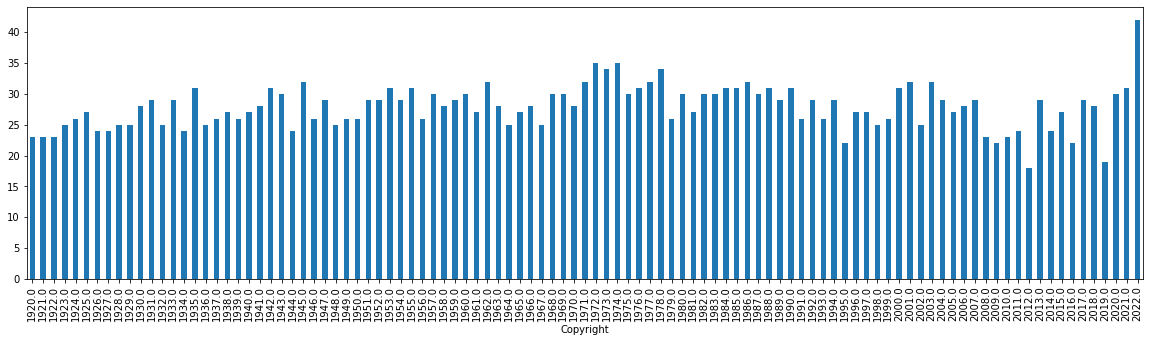

In [21]:
rezie[(rezie["Typologie"] == "hraný") & (rezie["Délka"] == "dlouhometrážní")].groupby("Copyright")["Věk"].min().plot.bar(figsize=(20,5))

### Režie: další pikošky

In [22]:
odrezirovano = pd.Series(rezie.groupby("Režie")["Film"].nunique(), name="Odrežírováno")

In [23]:
rezie = rezie.merge(odrezirovano, on="Režie")

In [24]:
rezie[(rezie["Odrežírováno"] >= 10) & (rezie["Délka"] == "dlouhometrážní")].groupby("Režie")["Počet lidí"].mean().nlargest(10)

Režie
Ladislav Rychman (7892)     127.909091
Tomáš Vorel (106)           121.916667
Václav Matějka (29527)      119.214286
Oldřich Lipský (7883)       118.095238
Jan Svěrák (476)            111.200000
Karel Janák (16647)         111.125000
K. M. Walló (51350)         109.583333
Zdeněk Podskalský (4749)    107.666667
Juraj Herz (7875)           106.411765
Otakar Vávra (9507)         103.282609
Name: Počet lidí, dtype: float64

In [25]:
rezie[(rezie["Odrežírováno"] >= 10) & (rezie["Délka"] == "dlouhometrážní")].groupby("Režie")["Počet lidí"].median().nlargest(10)

Režie
Tomáš Vorel (106)          119.5
Jan Svěrák (476)           118.0
Karel Janák (16647)        117.5
Václav Matějka (29527)     117.0
Oldřich Lipský (7883)      111.0
K. M. Walló (51350)        109.5
Ladislav Rychman (7892)    103.0
Jaroslav Soukup (1171)     100.0
Juraj Herz (7875)           99.0
Zdeněk Troška (3874)        99.0
Name: Počet lidí, dtype: float64

In [26]:
rezie.explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(10)

Režie
Otakar Vávra (9507)        1993
Karel Kachyňa (3526)       1288
Oldřich Lipský (7883)      1114
Karel Steklý (35894)       1079
Zdeněk Troška (3874)        993
Martin Frič (20324)         969
Juraj Herz (7875)           958
Dušan Klein (2568)          942
Václav Vorlíček (1044)      928
Ladislav Rychman (7892)     913
Name: Hrají, dtype: int64

In [27]:
nejobsazovanejsi = df.explode("Hrají").groupby("Hrají")["Film"].nunique().nlargest(500).index.to_list()
df_nejobsazovanejsi = df.explode("Hrají")
df_nejobsazovanejsi = df_nejobsazovanejsi[df_nejobsazovanejsi["Hrají"].isin(nejobsazovanejsi)]
df_nejobsazovanejsi.explode("Režie").groupby("Režie")["Hrají"].nunique().nlargest(10)

Režie
Otakar Vávra (9507)         329
Martin Frič (20324)         286
Karel Steklý (35894)        285
Karel Kachyňa (3526)        236
Oldřich Lipský (7883)       234
Ivo Novák (7889)            229
Josef Mach (7885)           229
Vladimír Čech (7871)        229
Václav Vorlíček (1044)      228
Zdeněk Podskalský (4749)    218
Name: Hrají, dtype: int64

In [28]:
df.explode("Režie").explode("Žánr").groupby("Režie")["Žánr"].nunique().nlargest(10)

Režie
Martin Frič (20324)           26
Otakar Vávra (9507)           25
Věra Chytilová (1555)         23
Evald Schorm (7895)           22
Karel Kachyňa (3526)          19
F. A. Brabec (5610)           18
Jaromil Jireš (5317)          16
Svatopluk Innemann (33860)    16
Václav Vorlíček (1044)        16
neuvedeno                     16
Name: Žánr, dtype: int64

In [29]:
rezie.explode("Scénář").groupby("Režie")["Scénář"].nunique().nlargest(10)

Režie
Martin Frič (20324)           82
Tomáš Vorel (106)             57
Miroslav Cikán (31969)        42
Václav Binovec (37467)        42
Vladimír Čech (7871)          40
Svatopluk Innemann (33860)    36
Karel Lamač (37847)           31
Karel Kachyňa (3526)          30
Oldřich Lipský (7883)         29
Otakar Vávra (9507)           28
Name: Scénář, dtype: int64

In [30]:
rezie.explode("Kamera").groupby("Režie")["Kamera"].nunique().nlargest(10)

Režie
Otakar Vávra (9507)         79
J. A. Holman (37290)        62
Michael Kocáb (9669)        38
David Sís (10869)           37
Martin Frič (20324)         32
Helena Třeštíková (709)     30
Miroslav Janek (536)        30
Vladimír Škultéty (7223)    30
Václav Kubásek (37286)      28
Pavel Abrahám (19039)       27
Name: Kamera, dtype: int64

In [31]:
rezie[rezie["Režie"] == "J. A. Holman"]["Kamera"].to_list()

[]

In [32]:
rezie[rezie["Režie"].str.contains("/ž/")]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,Začátek výroby,Konec výroby,Lidé,Počet lidí,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk,Odrežírováno


In [33]:
rezie[rezie["Režie"] == "Otakar Vávra"]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,Začátek výroby,Konec výroby,Lidé,Počet lidí,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk,Odrežírováno


In [34]:
df.explode("Režie").explode("Dirigent").groupby("Režie")["Dirigent"].nunique().nlargest(10)

Režie
Jan Hřebejk (4831)       7
Petr Nikolaev (540)      6
Viktor Polesný (7797)    5
Dušan Klein (2568)       3
Filip Renč (558)         3
Jiří Vejdělek (24168)    3
Tomáš Vorel (106)        3
F. A. Brabec (5610)      2
Hynek Bočan (2947)       2
Jan Svěrák (476)         2
Name: Dirigent, dtype: int64

In [35]:
df.explode("Režie").explode("Střih").groupby("Režie")["Střih"].nunique().nlargest(10)

Režie
K. M. Walló (51350)          19
Břetislav Pojar (3113)       17
Karel Vachek (565)           17
David Čálek (495)            16
Tomáš Vorel (106)            13
Věra Chytilová (1555)        13
Karel Kachyňa (3526)         12
Milan Cieslar (3593)         12
Vlasta Pospíšilová (4386)    12
Radim Špaček (496)           11
Name: Střih, dtype: int64

In [36]:
df.explode("Režie").explode("Pomocná režie").groupby("Režie")["Pomocná režie"].nunique().nlargest(10)

Režie
K. M. Walló (51350)          25
Otakar Vávra (9507)          23
Agnieszka Holland (12106)    21
Karel Kachyňa (3526)         20
Pavel Abrahám (19039)        20
Jindřich Polák (7891)        18
Jaromil Jireš (5317)         17
Jiří Hanibal (7873)          17
Ivo Novák (7889)             15
Václav Matějka (29527)       15
Name: Pomocná režie, dtype: int64

In [37]:
df.explode("Kamera").explode("Hrají").groupby("Kamera")["Hrají"].nunique().nlargest(10)

Kamera
Vladimír Smutný (1772)    1733
Jaromír Šofr (4285)       1671
Josef Illík (12730)       1637
Jan Čuřík (4946)          1500
Jiří Macháně (11743)      1469
Ivan Šlapeta (2968)       1419
Josef Vaniš (9510)        1419
Jiří Macák (1725)         1389
Jan Stallich (126242)     1382
Viktor Růžička (10079)    1252
Name: Hrají, dtype: int64

In [38]:
kariery_reziseru = pd.Series(df.explode("Režie").groupby("Režie")["Copyright"].max() -df.explode("Režie").groupby("Režie")["Copyright"].min(), name="Kariéry režisérů")

In [39]:
kariery_reziseru.sort_values(ascending=False).nlargest(15)

Režie
Břetislav Pojar (3113)        60
Otakar Vávra (9507)           59
Karel Vachek (565)            59
Hermína Týrlová (4754)        58
Václav Vorlíček (1044)        57
Jan Němec (3041)              56
Dušan Klein (2568)            55
Jiří Menzel (7887)            52
Agnieszka Holland (12106)     51
Vojtěch Jasný (4666)          50
Karel Kachyňa (3526)          50
Jan Švankmajer (406)          50
Rajko Grlić (80991)           47
Věra Chytilová (1555)         47
Věra Plívová-Šimková (186)    46
Name: Kariéry režisérů, dtype: int64

<AxesSubplot:ylabel='Frequency'>

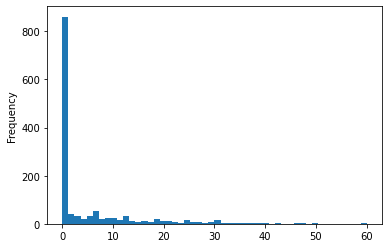

In [40]:
kariery_reziseru.plot.hist(bins=50)

In [41]:
df[(df["Copyright"] > 1918) & (df["Copyright"] < 1939)].explode("Režie").explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(5)

Režie
Svatopluk Innemann (33860)    486
Martin Frič (20324)           473
Karel Lamač (37847)           379
Vladimír Slavínský (31967)    367
Václav Binovec (37467)        351
Name: Hrají, dtype: int64

In [42]:
df[(df["Copyright"] > 1918) & (df["Copyright"] < 1939)].explode("Režie").groupby("Režie")["Film"].nunique().nlargest(5)

Režie
neuvedeno                     129
Svatopluk Innemann (33860)     46
Karel Dodal (127380)           42
Karel Lamač (37847)            41
Martin Frič (20324)            41
Name: Film, dtype: int64

In [43]:
df[(df["Copyright"] >= 1939) & (df["Copyright"] <= 1944)].explode("Režie").explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(5)

Režie
Miroslav Cikán (31969)        242
Martin Frič (20324)           240
Vladimír Slavínský (31967)    225
Otakar Vávra (9507)           189
František Čáp (13530)         183
Name: Hrají, dtype: int64

In [44]:
df[(df["Copyright"] >= 1939) & (df["Copyright"] <= 1944)].explode("Režie").groupby("Režie")["Film"].nunique().nlargest(5)

Režie
Martin Frič (20324)           19
Miroslav Cikán (31969)        17
Vladimír Slavínský (31967)    13
Otakar Vávra (9507)           12
František Čáp (13530)         10
Name: Film, dtype: int64

In [45]:
df[(df["Copyright"] >= 1945) & (df["Copyright"] <= 1989)].explode("Režie").explode("Hrají").groupby("Režie")["Hrají"].nunique().nlargest(5)

Režie
Otakar Vávra (9507)        1843
Karel Kachyňa (3526)       1173
Oldřich Lipský (7883)      1114
Karel Steklý (35894)       1074
Ladislav Rychman (7892)     913
Name: Hrají, dtype: int64

In [46]:
df[(df["Copyright"] >= 1945) & (df["Copyright"] <= 1989)].explode("Režie").groupby("Režie")["Film"].nunique().nlargest(5)

Režie
Karel Kachyňa (3526)      42
Hermína Týrlová (4754)    35
Otakar Vávra (9507)       34
Jindřich Polák (7891)     30
Martin Frič (20324)       28
Name: Film, dtype: int64

In [47]:
rezie[rezie["Typologie"] == "hraný"].groupby("Režie")["Minutáž"].sum().nlargest(20).apply(lambda x: x/60)

Režie
Martin Frič (20324)           124.950000
Karel Lamač (37847)           108.433333
Václav Kubásek (37286)        104.600000
Vladimír Slavínský (31967)     79.066667
Otakar Vávra (9507)            74.533333
Miroslav Cikán (31969)         69.433333
Věra Plívová-Šimková (186)     67.350000
Karel Kachyňa (3526)           65.950000
Elmar Klos (4742)              65.600000
Svatopluk Innemann (33860)     62.450000
Václav Wasserman (37326)       57.533333
Juraj Herz (7875)              55.766667
Jiří Krejčík (7882)            52.766667
Jiří Menzel (7887)             52.733333
Jaroslav Soukup (1171)         51.066667
Josef Kokeisl (55986)          48.066667
Václav Binovec (37467)         47.066667
Zdeněk Troška (3874)           43.383333
Karel Steklý (35894)           41.900000
Vladimír Čech (7871)           40.233333
Name: Minutáž, dtype: float64

### Režiséři & éry

In [48]:
ery = {
    "R-U": [1898, 1918],
    "19-38": [1919, 1938],
    "39-45": [1939, 1944],
    "45-47": [1945, 1947],
    "48-68": [1948, 1968],
    "69-89": [1969, 1989],
    "90-92": [1990, 1992],
    "93-23": [1993, 2023]
}

In [49]:
for key, val in ery.items():
    print(key)
    print(rezie[(rezie["Copyright"] >= val[0]) & (rezie["Copyright"] <= val[1])].groupby("Režie")["Film"].nunique().nlargest(3))

R-U
Režie
Jan Kříženecký (127419)    42
Max Urban (95056)          12
Antonín Pech (99760)       11
Name: Film, dtype: int64
19-38
Režie
Svatopluk Innemann (33860)    46
Karel Dodal (127380)          42
Karel Lamač (37847)           41
Name: Film, dtype: int64
39-45
Režie
Martin Frič (20324)           19
Miroslav Cikán (31969)        17
Vladimír Slavínský (31967)    13
Name: Film, dtype: int64
45-47
Režie
Jiří Trnka (28391)       6
Otakar Vávra (9507)      6
František Čáp (13530)    5
Name: Film, dtype: int64
48-68
Režie
Martin Frič (20324)       25
Jiří Trnka (28391)        21
Hermína Týrlová (4754)    20
Name: Film, dtype: int64
69-89
Režie
Karel Kachyňa (3526)     25
Jindřich Polák (7891)    23
Dušan Klein (2568)       16
Name: Film, dtype: int64
90-92
Režie
Věra Chytilová (1555)    3
Bohdan Sláma (926)       2
Hynek Bočan (2947)       2
Name: Film, dtype: int64
93-23
Režie
Jan Hřebejk (4831)         21
Zdeněk Troška (3874)       17
Helena Třeštíková (709)    12
Name: Film, dtype: i

In [50]:
def v_ere(x):
    global ery
    for key, val in ery.items():
        if x >= val[0]:
            if x <= val [1]:
                return key

In [51]:
rezie["Éra"] = rezie["Copyright"].apply(v_ere)

In [52]:
rezie.groupby("Režie")["Éra"].nunique().nlargest()

Režie
Elmar Klos (4742)            5
Hermína Týrlová (4754)       5
Otakar Vávra (9507)          5
Bohumil Vošahlík (127436)    4
Bořivoj Zeman (8886)         4
Name: Éra, dtype: int64

## Náměty

In [53]:
namety = df.explode("Původní filmový námět")

In [54]:
namety.groupby("Původní filmový námět")["Film"].nunique().nlargest(10)

Původní filmový námět
Ota Hofman (126062)            47
Jan Procházka (34081)          28
Hermína Týrlová (4754)         23
František Vlček st. (87095)    22
Miloš Macourek (1045)          22
Jindřich Polák (7891)          21
Vladimír Kalina (4895)         21
Karel Steklý (35894)           18
Otakar Vávra (9507)            18
Věra Chytilová (1555)          18
Name: Film, dtype: int64

## Scénáře

In [55]:
scenare = df.explode("Scénář")

In [56]:
scenare.groupby("Scénář")["Film"].nunique().nlargest(10)

Scénář
Václav Wasserman (37326)      90
Otakar Vávra (9507)           68
Ota Hofman (126062)           64
Karel Steklý (35894)          60
Josef Neuberg (127301)        46
Vladimír Slavínský (31967)    45
Karel Kachyňa (3526)          42
Elmar Klos (4742)             40
Jiří Brdečka (18026)          39
Martin Frič (20324)           39
Name: Film, dtype: int64

## Komba a auterstvo

In [57]:
tvurci = df.explode("Režie").explode("Scénář").explode("Původní filmový námět").explode("Typologie")

In [58]:
tvurci = tvurci[(tvurci["Typologie"] == "hraný") & (tvurci["Délka"] == "dlouhometrážní")]

In [59]:
tvurci.groupby(["Režie","Scénář","Původní filmový námět"])["Film"].nunique().nlargest(10)

Režie                       Scénář                      Původní filmový námět     
Karel Steklý (35894)        Karel Steklý (35894)        Karel Steklý (35894)          12
Věra Plívová-Šimková (186)  Věra Plívová-Šimková (186)  Věra Plívová-Šimková (186)    12
Zdeněk Troška (3874)        Zdeněk Troška (3874)        Zdeněk Troška (3874)          12
Karel Kachyňa (3526)        Jan Procházka (34081)       Jan Procházka (34081)         11
                            Karel Kachyňa (3526)        Jan Procházka (34081)         11
Petr Schulhoff (7896)       Petr Schulhoff (7896)       Petr Schulhoff (7896)         10
Václav Vorlíček (1044)      Miloš Macourek (1045)       Miloš Macourek (1045)         10
Jan Hřebejk (4831)          Petr Jarchovský (2075)      Petr Jarchovský (2075)         9
Jindřich Polák (7891)       Jindřich Polák (7891)       Ota Hofman (126062)            9
Jiří Hanibal (7873)         Jiří Hanibal (7873)         Jiří Hanibal (7873)            9
Name: Film, dtype: int64

In [60]:
autorske = tvurci[(tvurci["Režie"] == tvurci["Scénář"]) & (tvurci["Scénář"] == tvurci["Původní filmový námět"])]
autorske.groupby("Režie")["Film"].nunique().nlargest(10)

Režie
Karel Steklý (35894)          12
Věra Plívová-Šimková (186)    12
Zdeněk Troška (3874)          12
Petr Schulhoff (7896)         10
Jiří Hanibal (7873)            9
Věra Chytilová (1555)          9
Jaroslav Soukup (1171)         8
Oldřich Lipský (7883)          8
Otakar Vávra (9507)            8
Jaroslav Papoušek (4930)       7
Name: Film, dtype: int64

In [61]:
for key, val in ery.items():
    print(key)
    print(autorske[(autorske["Copyright"] >= val[0]) & (autorske["Copyright"] <= val[1])].groupby("Režie")["Film"].nunique().nlargest(3))

R-U
Series([], Name: Film, dtype: int64)
19-38
Režie
Vladimír Slavínský (31967)    6
Karel Lamač (37847)           5
Gustav Machatý (33488)        4
Name: Film, dtype: int64
39-45
Režie
Miroslav Cikán (31969)        4
Vladimír Slavínský (31967)    1
Václav Krška (20325)          1
Name: Film, dtype: int64
45-47
Režie
Václav Krška (20325)    2
Josef Mach (7885)       1
Martin Frič (20324)     1
Name: Film, dtype: int64
48-68
Režie
Bořivoj Zeman (8886)    4
Jiří Sequens (7893)     4
Karel Zeman (37288)     4
Name: Film, dtype: int64
69-89
Režie
Věra Plívová-Šimková (186)    10
Karel Steklý (35894)           9
Petr Schulhoff (7896)          9
Name: Film, dtype: int64
90-92
Režie
František Fenič (608)      1
Hynek Bočan (2947)         1
Irena Pavlásková (1724)    1
Name: Film, dtype: int64
93-23
Režie
Zdeněk Troška (3874)    9
Tomáš Vorel (106)       6
Martin Šulík (5432)     5
Name: Film, dtype: int64


In [62]:
tvurci["Hlavní role"] = tvurci["Hrají"].apply(lambda x: x[0:3] if x else None)

In [63]:
tvurci = tvurci.explode("Hlavní role").explode("Hrají")

In [64]:
tvurci.groupby(["Režie","Scénář","Původní filmový námět","Hlavní role"])["Film"].nunique().nlargest(10)

Režie                     Scénář                     Původní filmový námět      Hlavní role            
Karel Lamač (37847)       Karel Lamač (37847)        Karel Lamač (37847)        Karel Lamač (37847)        5
Dušan Klein (2568)        Ladislav Pecháček (17135)  Ladislav Pecháček (17135)  Pavel Kříž (2990)          4
Jaroslav Papoušek (4930)  Jaroslav Papoušek (4930)   Jaroslav Papoušek (4930)   Josef Šebánek (69908)      4
Jindřich Polák (7891)     Jindřich Polák (7891)      Ota Hofman (126062)        Žaneta Fuchsová (36216)    4
                          Ota Hofman (126062)        Ota Hofman (126062)        Žaneta Fuchsová (36216)    4
Karel Lamač (37847)       Karel Lamač (37847)        Karel Lamač (37847)        Anny Ondráková (127280)    4
Martin Frič (20324)       Hugo Haas (37289)          Hugo Haas (37289)          Hugo Haas (37289)          4
Milan Vošmik (31970)      Ota Hofman (126062)        Ota Hofman (126062)        Jaroslav Vízner (27247)    4
                        

In [65]:
tvurci.groupby(["Režie","Scénář","Původní filmový námět","Hrají"])["Film"].nunique().nlargest(10)

Režie                       Scénář                      Původní filmový námět       Hrají                  
Karel Steklý (35894)        Karel Steklý (35894)        Karel Steklý (35894)        Miloslav Homola (18975)    8
                                                                                    Oldřich Velen (12725)      8
Petr Schulhoff (7896)       Petr Schulhoff (7896)       Petr Schulhoff (7896)       Jiřina Bílá (3629)         8
Jindřich Polák (7891)       Ota Hofman (126062)         Ota Hofman (126062)         Otto Šimánek (35353)       7
Karel Steklý (35894)        Karel Steklý (35894)        Karel Steklý (35894)        Jiří Lír (4926)            7
                                                                                    Karel Hábl (27177)         7
Oldřich Lipský (7883)       Oldřich Lipský (7883)       Oldřich Lipský (7883)       Miloš Kopecký (4959)       7
Tomáš Vorel (106)           Tomáš Vorel (106)           Tomáš Vorel (106)           Radomil Uhlíř (60

In [66]:
tvurci[tvurci["Copyright"] > 1945].groupby(["Režie","Hrají"])["Film"].nunique().nlargest(10)

Režie                   Hrají                   
Karel Steklý (35894)    Oldřich Velen (12725)       16
Oldřich Lipský (7883)   Lubomír Lipský (9728)       15
Martin Frič (20324)     Bohuš Hradil (128758)       14
Vladimír Čech (7871)    Oldřich Velen (12725)       14
Dušan Klein (2568)      Josef Somr (1054)           13
Oldřich Lipský (7883)   Josef Hlinomaz (26212)      13
                        Miloš Kopecký (4959)        13
Vladimír Čech (7871)    Miloš Vavruška (25435)      13
Václav Vorlíček (1044)  Oldřich Velen (12725)       13
                        Vladimír Menšík (126036)    13
Name: Film, dtype: int64

## Top lidé v jednotlivých profesích

In [67]:
for p in profese:
    df_pracovni = df[["Film",p]].explode(p)
    print(df_pracovni.groupby(p)["Film"].nunique().nlargest(6))
    print("***")

Animace
Hermína Týrlová (4754)             38
Stanislav Látal (4849)             22
Bohuslav Šrámek (129804)           21
Alfons Mensdorff-Pouilly (8768)    17
Jan Karpaš (125275)                17
Jan Dudešek (54248)                16
Name: Film, dtype: int64
***
Architekt
Štěpán Kopecký (127347)       157
Jan Zázvorka (28108)          135
Alois Mecera (127364)         111
Oldřich Bosák (4942)           93
Karel Škvor (81834)            82
Vilém Rittershain (127306)     81
Name: Film, dtype: int64
***
Asistent kamery
Václav Zajíček (10832)      55
Bohumil Vodička (126011)    53
Vojtěch Kuthan (18310)      52
Ivan Šimůnek (3259)         51
Jiří Zavřel (2408)          41
Emil Hora (88957)           40
Name: Film, dtype: int64
***
Asistent kamery
Václav Zajíček (10832)      55
Bohumil Vodička (126011)    53
Vojtěch Kuthan (18310)      52
Ivan Šimůnek (3259)         51
Jiří Zavřel (2408)          41
Emil Hora (88957)           40
Name: Film, dtype: int64
***
Asistent režie
Rudolf Stahl st

Scénář
Václav Wasserman (37326)      90
Otakar Vávra (9507)           68
Ota Hofman (126062)           64
Karel Steklý (35894)          60
Josef Neuberg (127301)        46
Vladimír Slavínský (31967)    45
Name: Film, dtype: int64
***
Skript
Irena Klausová (75485)       32
Pavla Marková (36607)        32
Dagmar Zelenková (126758)    28
Lenka Němečková (124941)     28
Věra Vláčilová (17915)       27
Dagmar Švejdová (38506)      25
Name: Film, dtype: int64
***
Spolupráce
Willy Ströminger (55487)    273
Antonín Frič (127707)       158
Karel Ješátko (45886)        85
Miloslav Mirvald (21426)     66
Václav Tomšovský (1486)      63
Alena Červená (125734)       60
Name: Film, dtype: int64
***
Střih
Miroslav Hájek (54607)         266
Antonín Zelenka (4758)         228
Jan Kohout (126135)            188
Josef Dobřichovský (126074)    152
Jiří Brožek (154)              139
Zdeněk Stehlík (76483)         126
Name: Film, dtype: int64
***
Technický scénář
Karel Kachyňa (3526)      35
Jindřich Polák 

## Nejčastější člověk vůbec

In [68]:
nejcastejsi = df[["Film","Lidé"]]
nejcastejsi.explode("Lidé").groupby("Lidé")["Film"].nunique().nlargest(10)

Lidé
Jan W. Speerger (55928)        282
Willy Ströminger (55487)       273
Miroslav Hájek (54607)         267
Theodor Pištěk (37366)         257
Antonín Zelenka (4758)         240
Jaroslav Tomsa (2576)          232
Eman Fiala (64088)             227
Jaroslav Marvan (9550)         209
František Filipovský (4735)    193
Jan Kohout (126135)            188
Name: Film, dtype: int64

In [69]:
nejcastejsi = df[df["Copyright"] >= 1945][["Film","Lidé"]]
nejcastejsi.explode("Lidé").groupby("Lidé")["Film"].nunique().nlargest(10)

Lidé
Miroslav Hájek (54607)         267
Jaroslav Tomsa (2576)          232
Bohumír Brunclík (126058)      176
Oldřich Velen (12725)          172
Josef Dobřichovský (126074)    170
Ladislav Lahoda (1817)         158
Jiří Koštýř (5973)             156
Mirko Musil (33555)            156
Josef Hlinomaz (26212)         148
Jiří Brožek (154)              146
Name: Film, dtype: int64

## Oskarové filmy

In [70]:
nejcastejsi = df[df["Film"].isin(seznamy["oskari"])][["Film","Lidé"]]
nejcastejsi.explode("Lidé").groupby("Lidé")["Film"].nunique().nlargest(10)

Lidé
Jiří Stach (34555)         2
Adam Matejka (126967)      1
Alois Fišárek (570)        1
Alois Vachek (130102)      1
Alojz Kramár               1
Andrej Chalimon (37311)    1
Andrej Šilan (59766)       1
Anna Volšičková (26068)    1
Anna Vášová (37301)        1
Anton Baláž                1
Name: Film, dtype: int64

In [71]:
nejcastejsi = df[df["Film"].isin(seznamy["oskarianominace"])][["Film","Lidé"]]
nejcastejsi.explode("Lidé").groupby("Lidé")["Film"].nunique().nlargest(10)

Lidé
Václav Šašek (1766)         5
Milada Ježková (79014)      4
Rudolf Hammer (5119)        4
Jiří Kučera (114418)        3
Jiří Menzel (7887)          3
Libuše Šafránková (2272)    3
Rudolf Beneš                3
Zdeněk Svěrák (1892)        3
Adolf Böhm (126000)         2
Alois Fišárek (570)         2
Name: Film, dtype: int64

## Normalizace

In [72]:
lide_normalizacniho_filmu = df[(df["Copyright"] >= 1972) & (df["Copyright"] <= 1989)]["Lidé"].explode("Lidé").drop_duplicates().to_list()

In [73]:
lide = persony[persony["Osoba"] == "fyzická"]["Jméno"].to_list()

In [74]:
mrtvi = persony[(persony["Rok úmrtí"] < 1990) | persony["Rok úmrtí"].isnull()]["Jméno"].to_list()
mrtvi

['Ondřej Mašek (1000)',
 'kino Světozor (100019)',
 'AD WOOD, s.r.o. (100038)',
 'Hypermarket Film s.r.o. (100039)',
 'Hypermarket Film s.r.o. (100039)',
 'Hypermarket Film s.r.o. (100039)',
 'Punk Film, s.r.o. (100076)',
 'Punk Film, s.r.o. (100076)',
 'Renata Pavlíčková (1001)',
 'Aleš Zábojník (10010)',
 'Tomáš Dalecký (100116)',
 'FILM FACTORY, s.r.o. (100137)',
 'FILM FACTORY CZ, s.r.o. (100138)',
 'Vojtěch Matyáš Jírovec (100139)',
 'Josef Gabriel (100156)',
 'Pegasos Film (100196)',
 'SisaArt (100197)',
 'Jakub Zich (1002)',
 'Asociácia slovenských filmových klubov – ASFK (100216)',
 'Asociácia slovenských filmových klubov – ASFK (100216)',
 'Starorežná Prostějov, k.s. (100219)',
 'Agentura Tomáš Zůbek (100221)',
 'Radka Production s.r.o. (100236)',
 'Radka Production s.r.o. (100236)',
 'Radka Production s.r.o. (100236)',
 'Radka Production s.r.o. (100236)',
 'MAUR film s.r.o. (100237)',
 'MAUR film s.r.o. (100237)',
 'MAUR film s.r.o. (100237)',
 'Miroslav Kochánek (10026)',
 '

In [75]:
lide_prednormalizacniho_filmu = df[(df["Copyright"] < 1972)]["Lidé"].explode("Lidé").drop_duplicates().to_list()
lide_postnormalizacniho_filmu = df[(df["Copyright"] > 1989)]["Lidé"].explode("Lidé").drop_duplicates().to_list()
lide_nenormalizacniho_filmu = [x for x in lide_prednormalizacniho_filmu if x in lide_postnormalizacniho_filmu]

In [76]:
nemohli_natacet = [x for x in lide_nenormalizacniho_filmu if x not in lide_normalizacniho_filmu]
nemohli_natacet = [x for x in nemohli_natacet if x in lide]
nemohli_natacet = [x for x in nemohli_natacet if x not in mrtvi]
nemohli_natacet

['Jára Kohout (4846)',
 'Lída Baarová (5202)',
 'Adina Mandlová (55611)',
 'Jan Calábek (87109)',
 'Sylva Langová (25592)',
 'Jarmila Turnovská (28264)',
 'Jiří Lehovec (4910)',
 'Arnošt Kavka (4844)',
 'Rafael Kubelík (7708)',
 'Boris Masník (79760)',
 'Václav Bedřich (7823)',
 'Břetislav Pojar (3113)',
 'Svatopluk Malý (8995)',
 'Ladislav Matějka (123516)',
 'Fan Vavřincová (35092)',
 'Otomar Krejča (7597)',
 'Ladislav Helge (7874)',
 'Jaroslav Hulák (5167)',
 'Vojtěch Jasný (4666)',
 'Miroslav Mráz (125568)',
 'Vlasta Chramostová (573)',
 'Miroslav Barvík (5059)',
 'Stanislav Milota (11046)',
 'Zdeněk Hrubec (9524)',
 'Jan Pixa (12718)',
 'Kamila Moučková (10793)',
 'Miloš Forman (7872)',
 'František Filip (7822)',
 'Saša Rašilov ml. (5280)',
 'Zdeněk Husták (15698)',
 'Dana Zátopková (7681)',
 'Miloš Kirschner (4957)',
 'Jiří Sehnal (13532)',
 'Luděk Eliáš (8451)',
 'Karel Berman (14224)',
 'Jiří Kolář (8567)',
 'Jiří Mucha (85997)',
 'Garik Seko (4858)',
 'Milena Jelínková (83526)

In [77]:
len(nemohli_natacet)

94

In [78]:
rezie[rezie["Režie"].isin(nemohli_natacet)].groupby("Režie")["Film"].nunique().nlargest(15)

Režie
Břetislav Pojar (3113)       24
Jan Němec (3041)             13
Vojtěch Jasný (4666)         12
Jiří Lehovec (4910)          11
František Filip (7822)        8
Juraj Jakubisko (6751)        8
Ladislav Helge (7874)         7
Miloš Forman (7872)           6
Drahomíra Vihanová (2076)     5
Václav Bedřich (7823)         4
Zdeněk Hrubec (9524)          3
Garik Seko (4858)             2
Ivan Balaďa (22789)           2
Ivan Passer (7890)            2
Eduard Hrubeš (36289)         1
Name: Film, dtype: int64

In [79]:
tvurci[tvurci["Scénář"].isin(nemohli_natacet)].groupby("Scénář")["Film"].nunique().nlargest(10)

Scénář
Jan Němec (3041)             10
Jiří Mucha (85997)            9
Ladislav Helge (7874)         7
Vojtěch Jasný (4666)          7
Miloš Forman (7872)           5
Arnošt Lustig (11300)         4
František Filip (7822)        4
Juraj Jakubisko (6751)        4
Drahomíra Vihanová (2076)     3
Eduard Verner (7935)          3
Name: Film, dtype: int64

In [80]:
df = pd.read_json(os.path.join("data", "filmy.json"))

In [81]:
for p in profese:
    df_pracovni = df[["Film",p]].explode(p)
    df_pracovni = df_pracovni[df_pracovni[p].isin(nemohli_natacet)] 
    print(df_pracovni.groupby(p)["Film"].nunique().nlargest(2))
    print("***")

Animace
Břetislav Pojar (3113)    15
Boris Masník (79760)      12
Name: Film, dtype: int64
***
Architekt
Leopold Zeman (1095)     3
Miloš Ditrich (10850)    3
Name: Film, dtype: int64
***
Asistent kamery
Stanislav Milota (11046)    15
Saša Rašilov ml. (5280)      5
Name: Film, dtype: int64
***
Asistent kamery
Stanislav Milota (11046)    15
Saša Rašilov ml. (5280)      5
Name: Film, dtype: int64
***
Asistent režie
Ivan Passer (7890)    3
Jan Němec (3041)      3
Name: Film, dtype: int64
***
Asistent střihu
Jaroslava Dlouhá (88714)    1
Name: Film, dtype: int64
***
Series([], Name: Film, dtype: int64)
***
Asistent vedoucího výroby
Karel Škorpík (26945)    1
Name: Film, dtype: int64
***
Series([], Name: Film, dtype: int64)
***
Assistent architekta
Leopold Zeman (1095)    15
Name: Film, dtype: int64
***
Autor komentáře
Jan Němec (3041)       2
Jiří Lehovec (4910)    2
Name: Film, dtype: int64
***
Series([], Name: Film, dtype: int64)
***
Series([], Name: Film, dtype: int64)
***
Series([], Na

<AxesSubplot:xlabel='Copyright'>

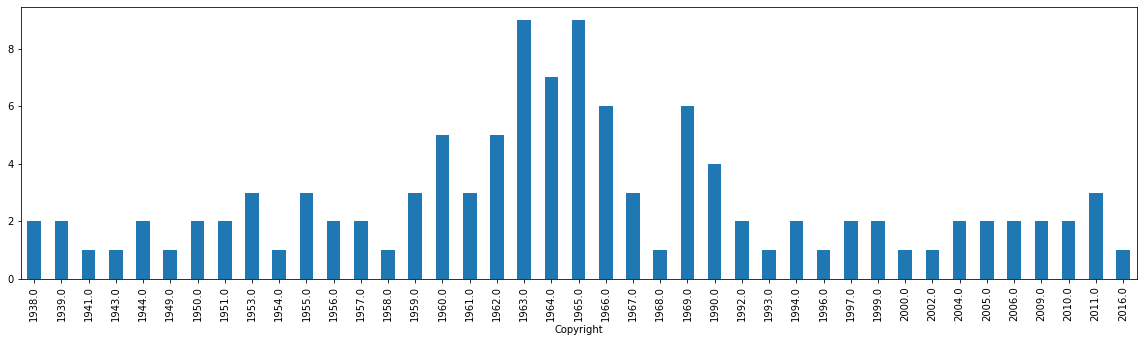

In [82]:
rezie[rezie["Režie"].isin(nemohli_natacet)].groupby("Copyright")["Film"].nunique().plot.bar(figsize=(20,5))

### Druhý pohled a raději s čistou databází

In [83]:
df = pd.read_json(os.path.join("data", "filmy.json"))

In [84]:
df["Lidé"] = df[profese].values.tolist()
df["Lidé"] = df["Lidé"].apply(lambda x: plose_jednoduse(x))

In [85]:
filmovi_lide = df[["Copyright","Film","Lidé"]].explode("Lidé")
kolik_filmu = pd.Series(filmovi_lide.groupby("Lidé")["Film"].nunique(), name="Filmů")
filmovi_lide = filmovi_lide.merge(kolik_filmu, on="Lidé")

In [86]:
posledni_film = pd.Series(filmovi_lide.groupby("Lidé")["Copyright"].max(), name="Poslední")
filmovi_lide = filmovi_lide.merge(posledni_film, on="Lidé")

In [87]:
filmovi_lide

,Copyright,Film,Lidé,Filmů,Poslední
0,1898,Polední výstřel na Mariánských hradbách (401709),Jan Kříženecký (127419),42,1911
1,1898,Cvičení s kužely Sokolů malostranských (401704),Jan Kříženecký (127419),42,1911
2,1898,Cyklisté (401705),Jan Kříženecký (127419),42,1911
3,1898,Defilování vojska o Božím těle na Královských ...,Jan Kříženecký (127419),42,1911
4,1898,Hanácké banderium (401707),Jan Kříženecký (127419),42,1911
...,...,...,...,...,...
231750,2022,Identita ES (402166),Mélodie Greciet,1,2022
231751,2022,Identita ES (402166),Emanuel Greciet,1,2022
231752,2022,Identita ES (402166),David Skamene,1,2022
231753,2022,Identita ES (402166),Victorie Ella Skamene,1,2022


In [88]:
filmovi_lide = filmovi_lide.merge(persony, left_on = "Lidé", right_on = "Jméno")

In [89]:
filmovi_lide = filmovi_lide[filmovi_lide["Osoba"] == "fyzická"]

In [90]:
filmovi_lide = filmovi_lide[(filmovi_lide["Copyright"] <= filmovi_lide["Rok úmrtí"]) | (filmovi_lide["Rok úmrtí"].isnull())]

In [91]:
filmovi_lide = filmovi_lide[filmovi_lide["Filmů"] >= 10]
filmovi_lide = filmovi_lide[filmovi_lide["Copyright"] < 2017]

<AxesSubplot:xlabel='Copyright'>

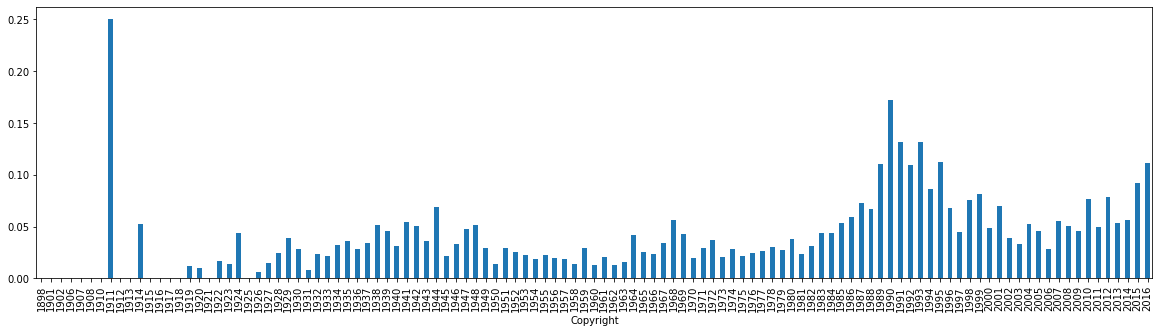

In [92]:
pd.Series(filmovi_lide[filmovi_lide["Poslední"] == filmovi_lide["Copyright"]].groupby("Copyright")["Lidé"].nunique() / filmovi_lide.groupby("Copyright")["Lidé"].nunique()).plot.bar(figsize=(20,5))